In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data.shape

(200, 4)

In [5]:
import seaborn as sns
%matplotlib inline

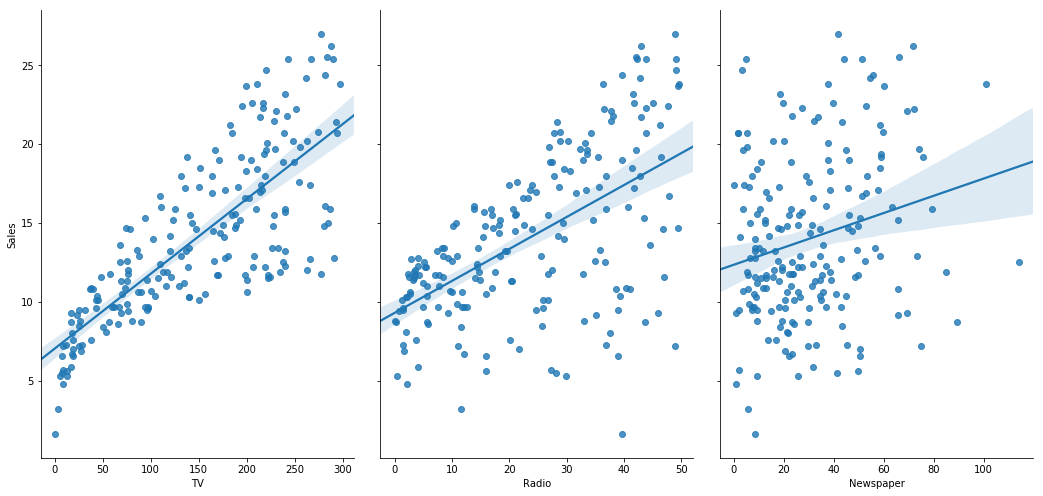

In [6]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')
# sns.swarmplot(x='TV', y='Sales', data=data)

In [56]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [57]:
# select a Series from the DataFrame
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [60]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
# print the intercept and coefficients
print(linreg.intercept_.round(2))
print(linreg.coef_.round(5))

2.88
[0.04656 0.17916 0.00345]


In [63]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088847),
 ('Newspaper', 0.0034504647111804343)]

In [51]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [52]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.384969471760807


In [72]:
# Feature Selection 
# Column Nespaper was dropped because it is almost insignificant to the model

# create a Python list of feature names
feature_cols = ['Radio', 'TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

print("Intercept = ",linreg.intercept_)
print("Co efficient for \"TV\" column = ",linreg.coef_[0])
print("Co efficient for \"Radio\" column = ",linreg.coef_[1])


# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print("Root Mean Squared Error = ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Score= ", linreg.score(X_test, y_test))

Intercept =  2.947515036029003
Co efficient for "TV" column =  0.18000650373005053
Co efficient for "Radio" column =  0.04686997498017342
Root Mean Squared Error =  1.398292489077774
Score=  0.894734495002707


### Conclusion is therefore
#### Advert More money should be spent on TV Advert and more sales will be made.